## Introdução a Python - aula 6

Breve revisão do conteúdo até aqui com algumas pequenas atividades feitas em sala. Além de uma mini tarefa para ajudá-los a entender e fazer o projeto final.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

In [29]:
df = pd.read_csv("datasets/dados_estudantes.csv")

# Visão inicial
print(df.head())
print(df.info())

# Padronizando texto
df["turno"] = df["turno"].str.lower().str.strip()
df["escola"] = df["escola"].str.lower().str.strip()

# Convertendo colunas numéricas
df["idade"] = pd.to_numeric(df["idade"], errors="coerce")
df["nota"] = pd.to_numeric(df["nota"], errors="coerce")

# Removendo valores ausentes essenciais
df = df.dropna(subset=["idade", "nota"])

   id  idade  turno   escola nota
0   1   15.0  Manhã  Pública  7.5
1   2   16.0  manhã  publica    8
2   3   15.0  Tarde  Pública    6
3   4   16.0  Noite  Pública  8.5
4   5    NaN  Manhã  Pública    7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   idade   99 non-null     float64
 2   turno   100 non-null    object 
 3   escola  100 non-null    object 
 4   nota    99 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB
None


In [30]:
def remover_acentos(texto):
    if isinstance(texto, str):
        normalized = unicodedata.normalize("NFKD", texto)
        return normalized.encode("ascii", "ignore").decode("utf-8")
    return texto

In [31]:
print(df["turno"].unique())

['manhã' 'tarde' 'noite']


In [32]:
for coluna in df.columns:
    df[coluna] = df[coluna].apply(remover_acentos)

print(df["turno"].unique())

['manha' 'tarde' 'noite']


In [33]:
# Estudantes maiores de idade
maiores_18 = df[df["idade"] >= 18]

# Estudantes do turno da manhã com nota alta
filtro_manha = df[
    (df["turno"] == "manhã") &
    (df["nota"] >= 8)
]

media_por_turno = df.groupby("turno")["nota"].mean()
contagem_por_escola = df["escola"].value_counts()

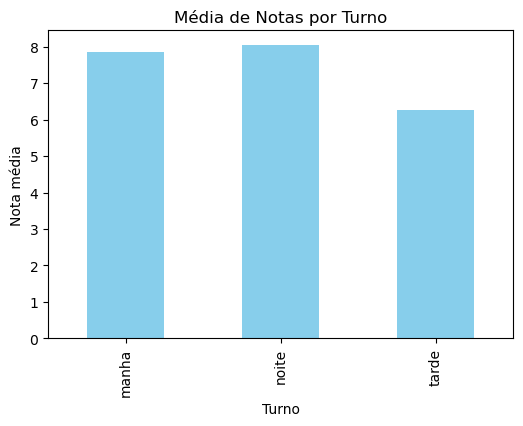

In [34]:
# Gráfico de exemplo 1 - Média de notas por turno
plt.figure(figsize=(6,4))
media_por_turno.plot(kind="bar", color="skyblue")
plt.title("Média de Notas por Turno")
plt.xlabel("Turno")
plt.ylabel("Nota média")
plt.show()

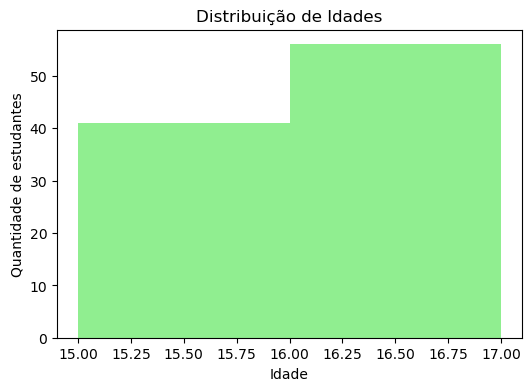

In [35]:
# Gráfico de exemplo 2 - Histograma de idades
plt.figure(figsize=(6,4))
plt.hist(df["idade"], bins=2, color="lightgreen")
plt.title("Distribuição de Idades")
plt.xlabel("Idade")
plt.ylabel("Quantidade de estudantes")
plt.show()

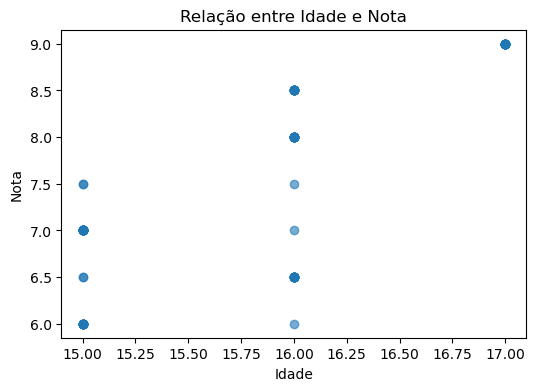

In [36]:
# Gráfico de exemplo 3 - Dispersão entre idade e nota
plt.figure(figsize=(6,4))
plt.scatter(df["idade"], df["nota"], alpha=0.6)
plt.title("Relação entre Idade e Nota")
plt.xlabel("Idade")
plt.ylabel("Nota")
plt.show()

## Tarefa

Foram feitos um dataset para cada aluno(a) usando um código em Python. Assim, com o intuito de terem um pouco mais de autonomia e entenderem o que é o projeto final, farão o seguinte:

- Analise se o dataset precisa de limpeza;
- Formule uma pergunta que gostaria de responder usando seu dataset;
- escolha duas colunas para analisar a fim de responder a pergunta;
- crie um gráfico simples como os que fizemos em aula;
- escreva um pequeno comentário no código discutindo se há causalidade ou apenas correlação entre as variáveis escolhidas;
- faça outro pequeno comentário sobre os resultados que teve com a análise gráfica e se conseguiu responder a pergunta inicial;
- Suba tudo no GitHub.